# 테스트 코드

In [332]:
import requests
from bs4 import BeautifulSoup

def crwal_test(date):
    
    if date == "20070816":
        url = "https://www.federalreserve.gov/fomc/minutes/20070918.htm#august16"
    elif date == "20070810":
        url = "https://www.federalreserve.gov/fomc/minutes/20070918.htm#august10"
    else:
        url = f"https://www.federalreserve.gov/fomc/minutes/{date}.htm"
    selector = "table > tr > td"

    html = requests.get(url)
#     encoding = "UTF-8"
#     html.encoding = encoding
    
    soup = BeautifulSoup(html.text, "lxml")
    txt = soup.select(selector)

    return txt



In [329]:
import requests
from bs4 import BeautifulSoup

def crwal_test(date):
    
    if date == "20070816":
        url = "https://www.federalreserve.gov/fomc/minutes/20070918.htm#august16"
    elif date == "20070810":
        url = "https://www.federalreserve.gov/fomc/minutes/20070918.htm#august10"
    else:
        url = f"https://www.federalreserve.gov/fomc/minutes/{date}.htm"
    selector = "table > tbody > tr"

    html = requests.get(url)
#     encoding = "UTF-8"
#     html.encoding = encoding
    
    soup = BeautifulSoup(html.text, "lxml")
    txt = soup.select(selector)

    return txt

In [ ]:
/html/body/table[2]/tbody/tr/td

In [ ]:
body > table:nth-child(5) > tbody > tr > td

In [358]:
txt = crwal_test("20011211") # index = 10
txt = crwal_test("20030129") # index = 8

# upper_line = "By unanimous vote, the minutes of the meeting of the Federal Open Market Committee held on"
# upper_line = "By unanimous vote, the minutes of the meeting of the Federal Open Market Committee held on"
# lower_line = "Return to top"
# main_txt = upper_line + txt.split(upper_line)[0]
# main_txt2 = main_txt.split(lower_line)[0]

print(txt[8].text)



In the agenda for this meeting, it was reported that advices of the election of the following members and alternate members of the Federal Open Market Committee for the period commencing January 1, 2003, and ending December 31, 2003, had been received and that these individuals had executed their oaths of office.

The elected members and alternate members were as follows:

William J. McDonough, President of the Federal Reserve Bank of New York, with
Jamie B. Stewart, Jr., First Vice President of the Federal Reserve Bank of New York, as alternate.

J. Alfred Broaddus, Jr., President of the Federal Reserve Bank of Richmond, with	
Cathy E. Minehan, President of the Federal Reserve Bank of Boston, as alternate.

Jack Guynn, President of the Federal Reserve Bank of Atlanta, with William Poole, President of the Federal Reserve Bank of St. Louis, as alternate

Michael H. Moskow, President of the Federal Reserve Bank of Chicago, with
Sandra Pianalto, 4 President of the Federal Reserve Bank o

# 크롤링

In [366]:
import requests
from bs4 import BeautifulSoup

def FOMC_crawling(date):
    """
    FOMC 회의록을 크롤링하는 함수
    
    Args(str): 회의 일자
    
    Returns(str): 회의록 본문 텍스트 데이터

    """
    #---------------2007년 9월 18일 이후 FOMC 회의록 크롤링---------------#
    
    if int(date) > 20070918:
        url = f"https://www.federalreserve.gov/monetarypolicy/fomcminutes{date}.htm"
    
        if int(date[:4]) > 2011:
            selector = "#article"
            encoding = "UTF-8"

        else:
            if date == "20080625":
                url = f"https://www.federalreserve.gov/monetarypolicy/fomc{date}.htm"

            selector = "#leftText"
            encoding = "ISO-8859-1"


        html = requests.get(url)
        html.encoding = encoding  # 글자 깨짐 방지
        soup = BeautifulSoup(html.text, "lxml")
        txt = soup.select(selector)[0].text

        #---------상한선과 하한선 설정 후 그 사이에 있는 텍스트만 추출---------#

        upper_line = "Developments in Financial Markets and Open Market Operations"
        upper_line2 = "Discussion of Financial Markets and Open Market Operations"
        upper_line3 = "AUTHORIZATION FOR DOMESTIC OPEN MARKET OPERATIONS" 
        upper_line4 = "Developments in Financial Markets, Open Market Operations, and Policy Normalization"
        upper_line5 = "Developments in Financial Markets and the Federal Reserve's Balance Sheet"
        upper_line6 = "The Manager of the System Open Market Account reported on recent developments in foreign exchange markets."
        lower_line = "_______________________"

        if upper_line in txt: 
            main_txt = upper_line + txt.split(upper_line)[1]
        elif upper_line2 in txt: 
            main_txt = upper_line2 + txt.split(upper_line2)[1]
        elif upper_line3 in txt: 
            main_txt = upper_line3 + txt.split(upper_line3)[1]
        elif upper_line4 in txt: 
            main_txt = upper_line4 + txt.split(upper_line4)[1]
        elif upper_line5 in txt: 
            main_txt = upper_line5 + txt.split(upper_line5)[1]
        else:
            main_txt = upper_line6 + txt.split(upper_line6)[1]

        main_txt2 = main_txt.split(lower_line)[0]
        
    
    #---------------2007년 9월 18일과 그 이전 FOMC 회의록 크롤링---------------#
    
    else:
        url = f"https://www.federalreserve.gov/fomc/minutes/{date}.htm"
        
        selector = "table > tr > td"
        encoding = "ISO-8859-1"
        
        if (int(date) > 20021210) or (int(date) <= 20020507): 
            if int(date) > 20070509:
                index = 6
            elif int(date) == 20011211:
                index = 10
            elif int(date) == 20030129:
                index = 8
            else:
                index = 7
                
            html = requests.get(url)
            html.encoding = encoding  # 글자 깨짐 방지
            soup = BeautifulSoup(html.text, "lxml")
            main_txt2 = soup.select(selector)[index].text
                
        else: 
            html = requests.get(url)
            html.encoding = encoding  # 글자 깨짐 방지
            soup = BeautifulSoup(html.text, "lxml")
            txt = soup.select(selector)[index].text
            
            upper_line = "AUTHORIZATION FOR DOMESTIC OPEN MARKET OPERATIONS"
            upper_line2 = "By unanimous vote, the minutes of the meeting of the Federal Open Market"
            lower_line = "Return to top"
            
            if upper_line in txt: 
                main_txt = upper_line + txt.split(upper_line)[1]
            else:
                main_txt = upper_line2 + txt.split(upper_line2)[1]
                
            main_txt2 = main_txt.split(lower_line)[0]

    return main_txt2

if __name__ == "__main__":
    test_txt = FOMC_crawling("20030129")
    print(test_txt)



In the agenda for this meeting, it was reported that advices of the election of the following members and alternate members of the Federal Open Market Committee for the period commencing January 1, 2003, and ending December 31, 2003, had been received and that these individuals had executed their oaths of office.

The elected members and alternate members were as follows:

William J. McDonough, President of the Federal Reserve Bank of New York, with
Jamie B. Stewart, Jr., First Vice President of the Federal Reserve Bank of New York, as alternate.

J. Alfred Broaddus, Jr., President of the Federal Reserve Bank of Richmond, with	
Cathy E. Minehan, President of the Federal Reserve Bank of Boston, as alternate.

Jack Guynn, President of the Federal Reserve Bank of Atlanta, with William Poole, President of the Federal Reserve Bank of St. Louis, as alternate

Michael H. Moskow, President of the Federal Reserve Bank of Chicago, with
Sandra Pianalto, 4 President of the Federal Reserve Bank o

In [220]:
# 회의 날짜 -> 각각의 url 코드에 사용
meeting_dates = ["20231213", "20231101", "20230920", "20230726", "20230614", 
                 "20230503", "20230322", "20230201", "20221214", "20221102",
                 "20220921", "20220727", "20220615", "20220504", "20220316",
                 "20220126", "20211215", "20211103", "20210922", "20210728",
                 "20210616", "20210428", "20210317", "20210127", "20201216",
                 "20201105", "20200916", "20200729", "20200610", "20200429",
                 "20200315", "20200129", "20191211", "20191030", "20190918",
                 "20190731", "20190619", "20190501", "20190320", "20190130", 
                 "20181219", "20181108", "20180926", "20180801", "20180613",
                 "20180502", "20180321", "20180131", "20171213", "20171101",
                 "20170920", "20170726", "20170614", "20170503", "20170315",
                 "20170201", "20161214", "20161102", "20160921", "20160727",
                 "20160615", "20160427", "20160316", "20160127", "20151216",
                 "20151028", "20150917", "20150729", "20150617", "20150429",
                 "20150318", "20150128", "20141217", "20141029", "20140917",
                 "20140730", "20140618", "20140430", "20140319", "20140129",
                 "20131218", "20131030", "20130918", "20130731", "20130619",
                 "20130501", "20130320", "20130130", "20121212", "20121024",
                 "20120913", "20120801", "20120620", "20120425", "20120313",
                 "20120125", "20111213", "20111102", "20110921", "20110809",
                 "20110622", "20110427", "20110315", "20110126", "20101214",
                 "20101103", "20100921", "20100810", "20100623", "20100428",
                 "20100316", "20100127", "20091216", "20091104", "20090923",
                 "20090812", "20090624", "20090429", "20090318", "20090128",
                 "20081216", "20081029", "20080916", "20080805", "20080625",
                 "20080430", "20080318", "20080130", "20071211", "20071031", # 124부터 테스트
                 "20070918", "20070807", "20070628", "20070509", "20070321", 
                 "20070131", "20061212", "20061025", "20060920", "20060808", # 145부터 테스트
                 "20060629", "20060510", "20060328", "20060131", "20051213", 
                 "20051101", "20050920", "20050809", "20050630", "20050503", 
                 "20050322", "20050202", "20041214", "20041110", "20040921", 
                 "20040810", "20040630", "20040504", "20040316", "20040128", 
                 "20031209", "20031028", "20030916", "20030812", "20030625",
                 "20030506", "20030318", "20030129", "20021210", "20021106",
                 "20020924", "20020813", "20020626", "20020507", "20020319",
                 "20020130", "20011211", "20011106", "20011002", "20011002",
                 "20010821", "20010627", "20010515", "20010320", "20010131",
                 "20001219", "20001115", "20001003", "20000822", "20000628"
                 ] 

print(len(meeting_dates))

190


In [221]:
# 리스트에 각각의 문서의 본문 텍스트 데이터 저장
from tqdm.notebook import tqdm

doc_lst = []
for date in tqdm(meeting_dates[145:]):
    print(date)
    txt = FOMC_crawling(date)
    doc_lst.append(txt)


  0%|          | 0/45 [00:00<?, ?it/s]

20051101
20050920
20050809
20050630
20050503
20050322
20050202
20041214
20041110
20040921
20040810
20040630
20040504
20040316
20040128
20031209
20031028
20030916
20030812
20030625
20030506
20030318
20030129
20021210
20021106
20020924
20020813
20020626
20020507
20020319
20020130
20011211
20011106
20011002
20011002
20010821
20010627
20010515
20010320
20010131
20001219
20001115
20001003
20000822
20000628


In [274]:
doc_lst[44] # 22, 31

"\n\r\nBy unanimous vote, the minutes of the meeting of the Federal Open Market Committee held on May 16, 2000, were approved.   \r\n\r\nBy unanimous vote, David J. Stockton was elected to serve as economist until the election of his successor at the first meeting of the Committee after December 31, 2000, with the understanding that in the event of the discontinuance of his official connection with the Board of Governors he would cease to have any official connection with the Federal Open Market Committee.\r\n\r\nThe Manager of the System Open Market Account reported on recent developments in foreign exchange markets.  There were no open market operations in foreign currencies for the System's account in the period since the previous meeting, and thus no vote was required of the Committee.\r\n\r\nThe Manager also reported on developments in domestic financial markets and on System open market transactions in government securities and federal agency obligations during the period May 16,

In [347]:
meeting_dates[145:][22]

'20030129'

# 토큰화

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

def FOMC_tokenize(doc):
    """
    문서 내의 텍스트를 토큰화하는 함수
    
    Args: 
        doc(str): 회의록 본문 텍스트 데이터
    
    Returns:
        word_tokens1(list): 문장 단위로 토큰화 된 2차원 리스트 -> 문장 벡터를 생성하기 위함
        word_tokens2(list): 문서 단위로 토큰화 된 1차원 리스트 -> 문서 벡터를 생성하기 위함
    """
    
    #-------------문장 토큰화-------------#
    sent_tokens = sent_tokenize(doc)
    
    
    #-------------단어 토큰화-------------#
    
    # 문장 단위로 구분된 토큰 (2차원 리스트)
    tokenize_by_sent = [word_tokenize(sentence) for sentence in sent_tokens]
    
    # 문서 단위로 구분된 토큰 (1차원 리스트)
    tokenize_by_doc = word_tokenize(doc)
    
    return tokenize_by_sent, tokenize_by_doc

if __name__ == "__main__":
    tokenize_by_sent, tokenize_by_doc = FOMC_tokenize(doc_lst[0])
    print(tokenize_by_sent[:3]) # 문장 단위로 구분 (2차원 리스트)
    print(tokenize_by_doc[:72]) # 문서 단위로 구분 (1차원 리스트)
    

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.'], ['Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates', ',', 'an', 'increase', 'in', 'equity', 'prices', ',', 'and', 'a', 'depreciation', 'in', 'the', 'dollar', '.'], ['The', 'rise', 'in', 'equity', 'prices', 'was', 'supported', 'by', 'the', 'decline', 'in', 'Treasury', 'yields', 'and', 'by', 'earnings', 'growth', 'that', 'exceeded', 'consensus', 'expectations', '.']]
['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.', 'Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates'

In [5]:
# 리스트에 각각의 문서의 토큰화된 본문 텍스트 데이터 저장

tokenized_sent_lst = [] # 문서별, 문장별로 저장된 3차원 리스트
tokenized_doc_lst = [] # 문서별로 저장된 2차원 리스트

for doc in tqdm(doc_lst):
    tokenize_by_sent, tokenize_by_doc = FOMC_tokenize(doc)
    tokenized_sent_lst.append(tokenize_by_sent)
    tokenized_doc_lst.append(tokenize_by_doc)
    

  0%|          | 0/124 [00:00<?, ?it/s]

In [6]:
import itertools

# 문장 단위로 저장된 2차원 데이터
sentence_tokens = list(itertools.chain(*tokenized_sent_lst))
# 단어 단위로 저장된 1차원 데이터
word_tokens = list(itertools.chain(*sentence_tokens))

print(tokenized_sent_lst[0][:2])
print("------------------------------------------------------------")
print("문서 개수:", len(tokenized_doc_lst))
print("문장 개수:", len(sentence_tokens))
print("단어 개수:", len(word_tokens))


[['Developments', 'in', 'Financial', 'Markets', 'and', 'Open', 'Market', 'Operations', 'The', 'manager', 'turned', 'first', 'to', 'a', 'review', 'of', 'developments', 'in', 'financial', 'markets', 'over', 'the', 'intermeeting', 'period', '.'], ['Financial', 'conditions', 'eased', ',', 'driven', 'by', 'a', 'decline', 'in', 'interest', 'rates', ',', 'an', 'increase', 'in', 'equity', 'prices', ',', 'and', 'a', 'depreciation', 'in', 'the', 'dollar', '.']]
------------------------------------------------------------
문서 개수: 124
문장 개수: 32409
단어 개수: 998560


# Word2Vec

In [7]:
from gensim.models import Word2Vec

sent_model = Word2Vec(sentence_tokens, vector_size=500, window=5, min_count=5, workers=4) # 문장 단위 모델
doc_model = Word2Vec(tokenized_doc_lst, vector_size=500, window=5, min_count=5, workers=4) # 문서 단위 모델

In [8]:
# 임베딩된 단어 벡터 추출
word_vectors = doc_model.wv

# 모델에 포함된 모든 단어들을 얻기
words = list(word_vectors.key_to_index.keys())

# 단어들 출력
print(words[:20])
print(len(words))

['the', ',', '.', 'of', 'in', 'and', 'to', 'that', 'a', 'for', 'on', 'inflation', 'Committee', 'as', 'The', 'was', 'rate', 'at', 'economic', 'with']
4901


In [9]:
# 임베딩된 단어 벡터를 얻기
word_vectors = doc_model.wv

# 특정 단어에 대한 벡터를 가져오기
print("#-------------------\"inflation\"에 대한 단어 벡터-------------------#\n")
print(word_vectors['inflation'][:20])

# 비슷한 단어 찾기
print("\n#---------------------\"inflation\"과 유사한 단어---------------------#\n")
print(word_vectors.most_similar('inflation'))

#-------------------"inflation"에 대한 단어 벡터-------------------#

[-0.9085567   0.04972047 -0.6899447   0.42417926  0.42744374 -0.5772448
  0.992659    0.21844213 -1.2215728   0.15961725  0.22722462 -1.238221
 -0.22012462 -0.73879266  1.3967395   0.9383106   1.1179019  -0.6735379
  0.74511784  1.3278632 ]

#---------------------"inflation"과 유사한 단어---------------------#

[('longer-run', 0.5301861763000488), ('objective', 0.5035025477409363), ('remain', 0.48033255338668823), ('Inflation', 0.4778870642185211), ('core', 0.4621104598045349), ('run', 0.45684731006622314), ('market-based', 0.45270997285842896), ('inflationary', 0.44774702191352844), ('stable', 0.44609150290489197), ('anchored', 0.44462549686431885)]


# 문서 벡터 생성

In [10]:
def cal_doc_vec(doc_num):
    """
    문서 벡터를 생성하는 함수
    
    Args:
        doc_num(int): 문서의 번호
        
    Returns:
        doc_vec(list): 문서 벡터
    """
    #----------------문서 벡터 생성----------------#
    
    # 문서 내 단어 벡터 리스트 
    word_vec = [doc_model.wv[word] for word in tokenized_doc_lst[doc_num] if word in doc_model.wv]
    
    # 합계를 통한 문서 벡터 생성
    doc_vec = sum(word_vec)
    
    return doc_vec
    

if __name__ == "__main__":
    doc_vec = cal_doc_vec(0)  # 0번 문서 벡터
    print(doc_vec[:24])
    

[ -210.71797   666.57043    27.92118   580.35583  -231.6175  -1094.9336
   510.7893    521.61      178.78061   308.77338   257.4265    606.63104
   420.4605    391.39807   446.0201    395.0672    340.09555  -579.7696
   358.10168  -444.428    -571.2661   -298.44067  1882.9543    171.71658]


In [11]:
# 각각의 문서의 문서 벡터 리스트
doc_vec_lst = []

for i in tqdm(range(len(doc_lst))):
    doc_vec = cal_doc_vec(i)
    doc_vec_lst.append(doc_vec)
    

  0%|          | 0/124 [00:00<?, ?it/s]

In [12]:
# 0번 문서의 문서 벡터
print("#----------------------0번 문서의 문서 벡터(뒤에 생략)----------------------#\n")
print(doc_vec_lst[0][:30])

#----------------------0번 문서의 문서 벡터(뒤에 생략)----------------------#

[ -210.71797    666.57043     27.92118    580.35583   -231.6175
 -1094.9336     510.7893     521.61       178.78061    308.77338
   257.4265     606.63104    420.4605     391.39807    446.0201
   395.0672     340.09555   -579.7696     358.10168   -444.428
  -571.2661    -298.44067   1882.9543     171.71658   -372.3908
   -74.391594  1328.2708     379.35315    141.13332   -349.16107 ]


# K-menas 기법을 활용한 문서 분류

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# 0번 문서와 1번 문서의 비교
similarity = cosine_similarity(doc_vec_lst)
print("#-----------------------각각의 문서간의 코사인 유사도-----------------------#\n\n", similarity)


#-----------------------각각의 문서간의 코사인 유사도-----------------------#

 [[1.         0.98905087 0.99661577 ... 0.90028214 0.898522   0.93152523]
 [0.98905087 0.9999998  0.99096954 ... 0.92086065 0.9165646  0.9449135 ]
 [0.99661577 0.99096954 0.9999998  ... 0.8982307  0.89856505 0.93187845]
 ...
 [0.90028214 0.92086065 0.8982307  ... 1.0000002  0.95038974 0.9628438 ]
 [0.898522   0.9165646  0.89856505 ... 0.95038974 1.         0.9897642 ]
 [0.93152523 0.9449135  0.93187845 ... 0.9628438  0.9897642  1.0000001 ]]


In [14]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# K-평균 클러스터링 모델 초기화 (클러스터 개수는 예시로 2를 사용)
kmeans = KMeans(n_clusters=2, random_state=0)

# 클러스터링 수행
kmeans.fit(doc_vec_lst)

# 결과 출력
print("#-----------------------------클러스터링 결과-----------------------------#\n\n", kmeans.labels_)


#-----------------------------클러스터링 결과-----------------------------#

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
print([i for i, j in enumerate(list(kmeans.labels_)) if j == 1])

[15, 63, 71, 79, 87, 95, 103, 111]


### 1로 클로스터링된 문서들은 모두 "AUTHORIZATION FOR DOMESTIC OPEN MARKET OPERATIONS"와 관련된 문서이다.

# 클러스터링 결과 시각화

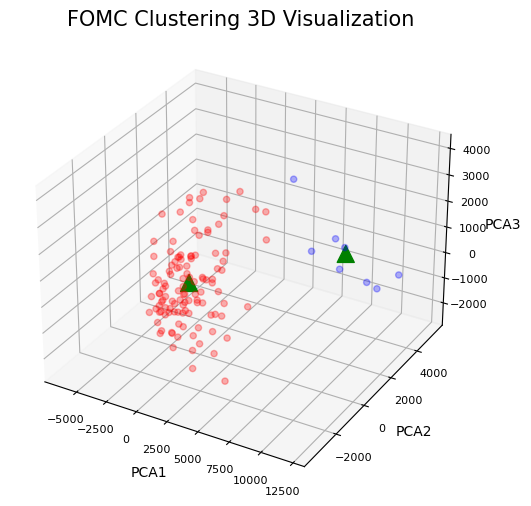

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.labels_  # 각각의 문서의 라벨
centers = kmeans.cluster_centers_  # 클러스터 중심점

# PCA를 이용하여 3차원으로 차원 축소
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(doc_vec_lst)
centers_reduced = pca.transform(centers)  # 중심점도 차원 축소

# 3D 플롯으로 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 라벨 크기를 8로 설정
ax.tick_params(labelsize=8) 


# 클러스터에 따라 다른 색상으로 표시
ax.scatter(X_reduced[labels == 0, 0], X_reduced[labels == 0, 1], X_reduced[labels == 0, 2], c='red', alpha=0.3)
ax.scatter(X_reduced[labels == 1, 0], X_reduced[labels == 1, 1], X_reduced[labels == 1, 2], c='blue', alpha=0.3)

# 중심점 시각화 (검은색 X 표시)
ax.scatter(centers_reduced[:, 0], centers_reduced[:, 1], centers_reduced[:, 2], c='green', marker='^', s=150, alpha=1.0)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("FOMC Clustering 3D Visualization", size=15)
plt.show()
